# League of Legends:
### Champion of Champions

In [ ]:
#Dependencies
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import squarify
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
import numpy as np
import seaborn as sns
import matplotlib as mp

sns.set_style("white")

from pprint import pprint
from config import api_key

### Initial data pull to being plotting graphs

In [ ]:
#Convert Gold Tier 1 URL to DF
gold_url = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/I?page=1&api_key=" + api_key
gold_data = requests.get(gold_url).json()
gold_data_df = pd.DataFrame(gold_data)

#Convert Gold Tier 2 URL to DF
gold_url2 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/II?page=1&api_key=" + api_key
gold_data2 = requests.get(gold_url2).json()
gold_data_df2 = pd.DataFrame(gold_data2)

#Convert Gold Tier 3 URL to DF
gold_url3 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/III?page=1&api_key=" + api_key
gold_data3 = requests.get(gold_url3).json()
gold_data_df3 = pd.DataFrame(gold_data3)

#Convert Gold Tier 4 URL to DF
gold_url4 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/IV?page=1&api_key=" + api_key
gold_data4 = requests.get(gold_url4).json()
gold_data_df4 = pd.DataFrame(gold_data4)

#Merge all DF into one using Concat
GDF = [gold_data_df, gold_data_df2, gold_data_df3, gold_data_df4]
gold_df = pd.concat(GDF)

#Drop unneeded columns - Clean Gold DF
clean_gold_df = gold_df.drop(columns=['queueType', 'summonerName', 'inactive', 'freshBlood', 'hotStreak', 'miniSeries'])

#Add all Gold summoner ids to a list
gold_summonerId_list = list(gold_df['summonerId'])

#Convert Platinum Tier 1 URL to DF
platinum_url = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/I?page=1&api_key=" + api_key
platinum_data = requests.get(platinum_url).json()
platinum_data_df = pd.DataFrame(platinum_data)

#Convert Platinum Tier 2 URL to DF
platinum_url2 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/II?page=1&api_key=" + api_key
platinum_data2 = requests.get(platinum_url2).json()
platinum_data_df2 = pd.DataFrame(platinum_data2)

#Convert Platinum Tier 3 URL to DF
platinum_url3 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/III?page=1&api_key=" + api_key
platinum_data3 = requests.get(platinum_url3).json()
platinum_data_df3 = pd.DataFrame(platinum_data3)

#Convert Platinum Tier 4 URL to DF
platinum_url4 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/IV?page=1&api_key=" + api_key
platinum_data4 = requests.get(platinum_url4).json()
platinum_data_df4 = pd.DataFrame(platinum_data4)

#Merge all DF into one using Concat
PDF = [platinum_data_df, platinum_data_df2, platinum_data_df3, platinum_data_df4]
platinum_df = pd.concat(PDF)

#Drop unneeded columns - Clean Platinum DF
clean_platinum_df = platinum_df.drop(columns=['queueType', 'summonerName', 'inactive', 'freshBlood', 'hotStreak', 'miniSeries'])

#Add all platinum summoner ids to a list
platinum_summonerId_list = list(platinum_df['summonerId'])

### Looped through first page of 100 summonerId to have data on individual users

In [ ]:
#Looping through top 100 summoners in Gold Tier and outputting data for champion they last used.
gold_summonerId = gold_summonerId_list[:100]

first_championID_list_gold = []
for i in gold_summonerId:
    gold_url2 = "https://na1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/" + i + "?api_key=" + api_key
    response = requests.get(gold_url2).json()
    first_championID_gold = response[0]
    first_championID_list_gold.append(first_championID_gold)
    
first_championID_list_gold_DF = pd.DataFrame(first_championID_list_gold)

#Looping through top 100 summoners in Platinum Tier and outputting data for champion they last used.
platinum_summonerId = platinum_summonerId_list[:100]

first_championID_list_platinum = []
for j in platinum_summonerId:
    platinum_url2 = "https://na1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/" + j + "?api_key=" + api_key
    response2 = requests.get(platinum_url2).json()
    first_championID_platinum = response2[0]
    first_championID_list_platinum.append(first_championID_platinum)
    
first_championID_list_plat_DF = pd.DataFrame(first_championID_list_platinum)

first_championID_list_plat_DF

### Data Collection

In [ ]:
# To get all player information from League-Exp-V4 api.
# And save each rank to csv.

tiers = ["IRON", "BRONZE", "SILVER", "GOLD", "PLATINUM", "DIAMOND","MASTER","GRANDMASTER","CHALLENGER"]
divisions = ["I", "II", "III", "IV"]

for tier in tiers:
    for division in divisions:
        combined_data = pd.DataFrame()
        page = 1
        emptypage = False
        while emptypage == False:
            url = f"https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/%22/
                  f"{tier}/{division}?page={page}&api_key={key}"
            data = requests.get(url).json()
            if data == []:
                print(f"You've reached empty page for {tier} {division}, the last page is {page -1}")
                emptypage = True
            if type(data) is dict:
                print(data["status"]["message"])
                break
            data_df = pd.DataFrame(data)
            combined_data = combined_data.append(data_df, ignore_index=True)
            page += 1
            if page % 10 == 0:
                print (f"{tier} {division}: 10 pages done, sleep for 10 seconds to aovid reaching limit")
                time.sleep(10)
        if combined_data.empty == False:
            combined_data.to_csv(f"populationdata/{tier}{division}_population.csv")

 - take 1.4% from each division - in order sufficient subset

In [ ]:
# extract summoner ID from the dataframe and use them as input to pull the champion mastery API
# Pulling first champion for each player
total_subset_df = pd.read_csv("subset_data/total_subset.csv")
summoner_id = total_subset_df["summonerId"].tolist()
request_num = 0

first_champion_list = []
for i in summoner_id:
    url = f"https://na1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/%7Bi%7D?api_key=%7Bkey%7D"
    response = requests.get(url).json()
    first_champion = response[0]
    first_champion_list.append(first_champion)
    request_num += 1
    if request_num % 50 == 0:
        print (f"50 requests done, {request_num}/30035, sleep for 50 s to aovid reaching limit")
        time.sleep(50)
champion_mastery_df = pd.DataFrame(first_champion_list)
champion_mastery_df.to_csv("subset_data/champion_mastery.csv")

Message #code

### Pull Data from DataDragon to create DF of Champion name with their ChampionID and Primary Role

In [94]:
#Pull Data from DataDragon to create DF of Champion name with their ChampionID
champions_data = pd.read_json(r'file:///Users/jw/Downloads/dragontail-10.21.1/10.21.1/data/en_US/champion.json')

#Initialising_dictionary
champion_dict = champions_data['data']

#Split Dictionary into Keys and Values
character = []
values = []
items = champion_dict.items()
for item in items:
    character.append(item[0]), values.append(item[1])

ID = []
for v in values:
    ID.append(v['key'])

Role = []
for x in values:
    Role.append(x['tags'][0])

champion_data_1 = pd.DataFrame({"Champion Name": character, "championId": ID, "Primary Role": Role})

#change data type to int64 - in order to merge 
champion_data_1['championId'] = champion_data_1['championId'].astype(str).astype(int).round(0)

### Make full dataframes for Each Tier based on full data subset- in order to begin analyzing

In [72]:
full_summoner_mastery = pd.read_csv('summoner_champion.csv')

#Make Full Iron DF - Ready for analysis
final_iron_df = full_summoner_mastery[full_summoner_mastery["tier"] == "IRON"]

#Merge full Iron DF with champion data
iron_combined_df = pd.merge(final_iron_df, champion_data_1, how = 'left', on = 'championId')

#Delete duplicate column
del iron_combined_df["Champion Name_x"]

#Rename column
iron_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

#Make Full bronze DF - ready for analysis
final_bronze_df = full_summoner_mastery[full_summoner_mastery["tier"] == "BRONZE"]

bronze_combined_df = pd.merge(final_bronze_df, champion_data_1, how = 'left', on = 'championId')

del bronze_combined_df["Champion Name_x"]

bronze_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

#Make Full Silver DataFrame - Ready for analysis
final_silver_df = full_summoner_mastery[full_summoner_mastery["tier"] == "SILVER"]

silver_combined_df = pd.merge(final_silver_df, champion_data_1, how = 'left', on = 'championId')

del silver_combined_df["Champion Name_x"]

silver_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

#Make full gold DF - ready for analysis
full_summoner_mastery = pd.read_csv('summoner_champion.csv')

final_gold_df = full_summoner_mastery[full_summoner_mastery["tier"] == "GOLD"]

gold_combined_df = pd.merge(final_gold_df, champion_data_1, how = 'left', on = 'championId')

del gold_combined_df["Champion Name_x"]

gold_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

#Make full platinum DataFrame - everything we need for analysis
final_platinum_df = full_summoner_mastery[full_summoner_mastery["tier"] == "PLATINUM"]

platinum_combined_df = pd.merge(final_platinum_df, champion_data_1, how = 'left', on = 'championId')

del platinum_combined_df["Champion Name_x"]

platinum_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

#Full DataFrame for Diamond, Master, GrandMaster and Challenger - combined into one
Diamond = full_summoner_mastery[full_summoner_mastery["tier"] == "DIAMOND"]
Master = full_summoner_mastery[full_summoner_mastery["tier"] == "MASTER"]
Grandmaster = full_summoner_mastery[full_summoner_mastery["tier"] == "GRANDMASTER"]
Challenger = full_summoner_mastery[full_summoner_mastery["tier"] == "CHALLENGER"]

DMGC = [Diamond, Master, Grandmaster, Challenger]
DMGC_df = pd.concat(DMGC)

DMGC_combined_df = pd.merge(DMGC_df, champion_data_1, how = 'left', on = 'championId')


del DMGC_combined_df["Champion Name_x"]

DMGC_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

combined_mastery = pd.merge(full_summoner_mastery, champion_data_1, how = 'left', on = 'championId')

del combined_mastery["Champion Name_x"]

combined_mastery.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

### Iron Tier Analysis

- Iron TreeMap

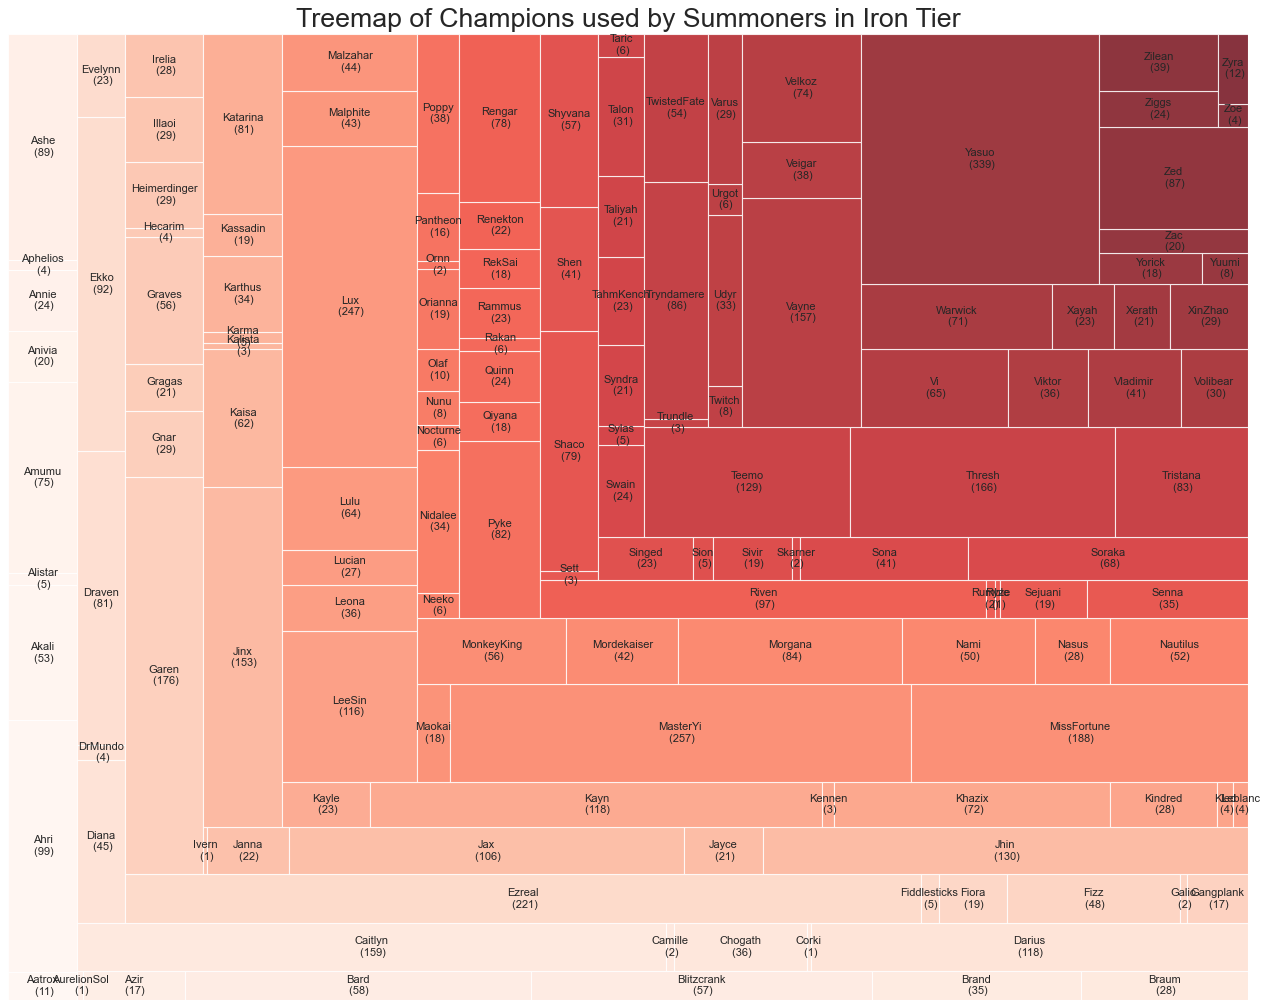

In [34]:
#Make Iron Iron TreeMap
treemap_1 = iron_combined_df.groupby('Champion Name').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('Reds')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Iron Tier', fontsize=24)
plt.axis('off')

plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Iron_Treemap.png")

- Iron Bar Chart

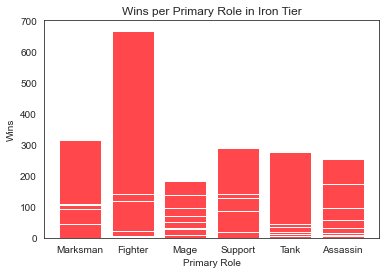

In [35]:
role = iron_combined_df['Primary Role']
wins = iron_combined_df['wins']

plt.bar(role,wins, align = "center", color= 'xkcd:light red')
plt.xlabel("Primary Role")
plt.ylabel("Wins")
plt.title('Wins per Primary Role in Iron Tier')
plt.show()

- Iron PieChart

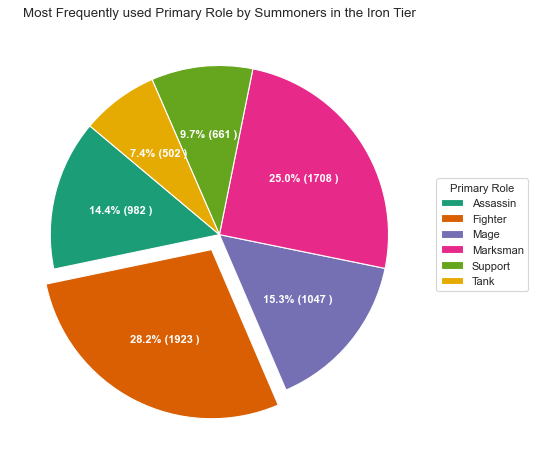

In [36]:
# Prepare Data
pie = iron_combined_df.groupby('Primary Role').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = pie['counts']
categories = pie['Primary Role']
explode = [0,0.1,0,0,0,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Primary Role", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Most Frequently used Primary Role by Summoners in the Iron Tier")

plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Iron_PieChart.png")

plt.show()

- Iron ScatterPlot

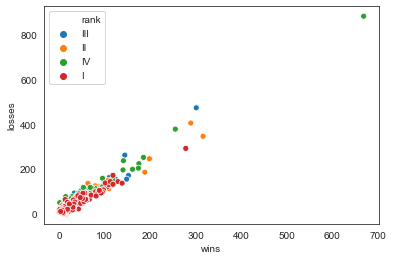

In [38]:
#wins vs losses from Iron subset
rank = iron_combined_df['rank']
sns.scatterplot(x=iron_combined_df.wins, y=iron_combined_df.losses, hue = rank)

- Averages

In [61]:
#Average amount of wins for summoner in Top 4 Tiers
iron_wins_avg = round(iron_combined_df['wins'].mean())
#Average amount of losses for summoner in Top 4 Tiers
iron_loss_avg = round(iron_combined_df['losses'].mean())

print("The Average Amount of wins for summoner in Iron Tier :" , iron_wins_avg)
print("The Average Amount of losses for summoner in Iron Tier :" , iron_loss_avg)

The Average Amount of wins for summoner in Iron Tier : 12
The Average Amount of losses for summoner in Iron Tier : 18


### Bronze Analysis

- Bronze TreeMap

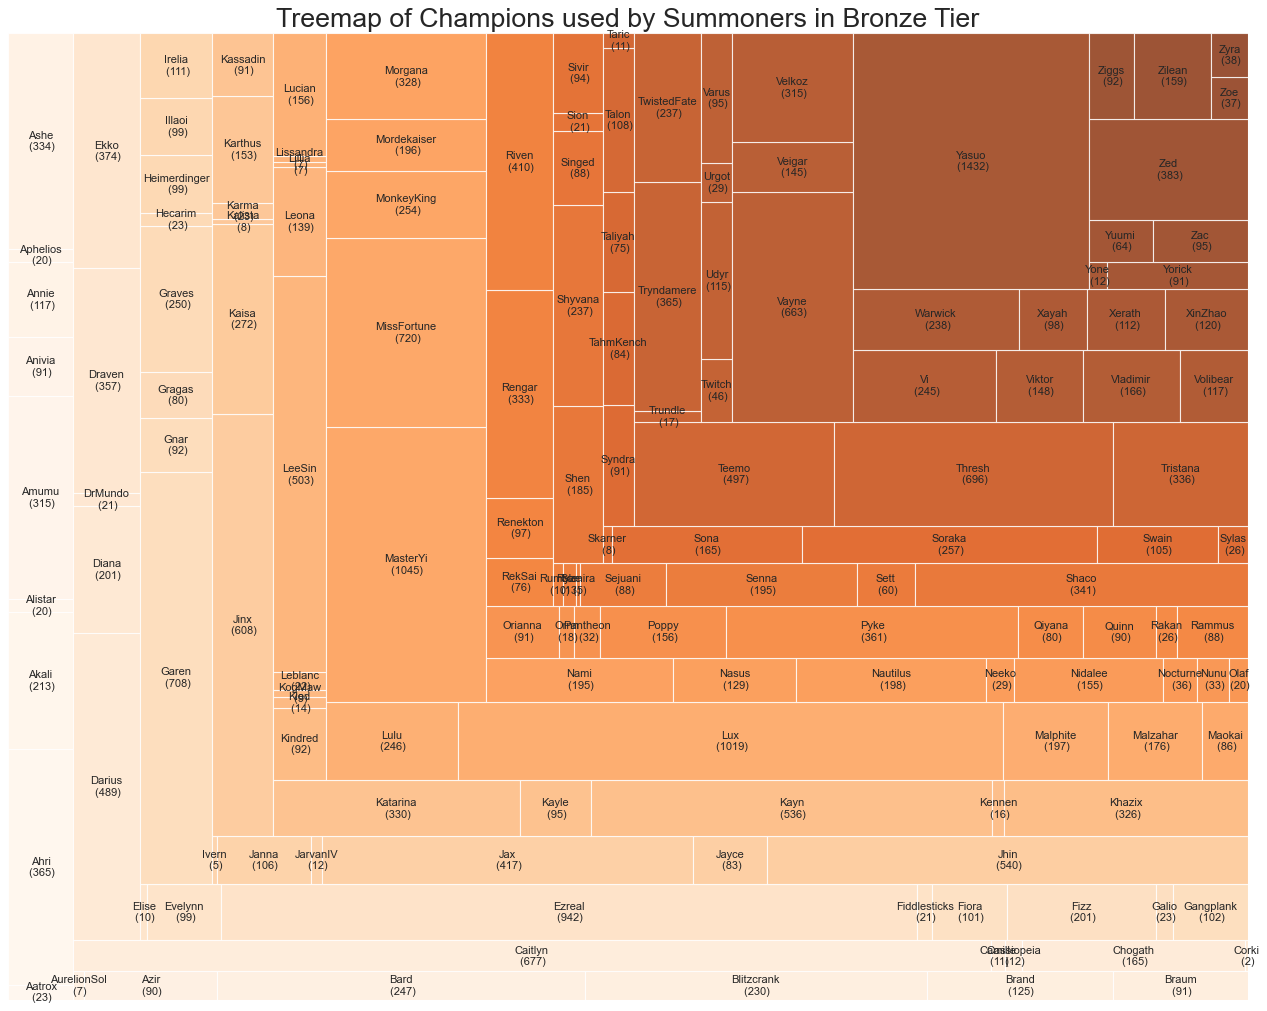

In [39]:
#Bronze TreeMap
treemap_1 = bronze_combined_df.groupby('Champion Name').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('Oranges')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Bronze Tier', fontsize=24)
plt.axis('off')

plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Bronze_Treemap.png")

- Bronze Bar Chart

TypeError: 'value' must be an instance of str or bytes, not a float

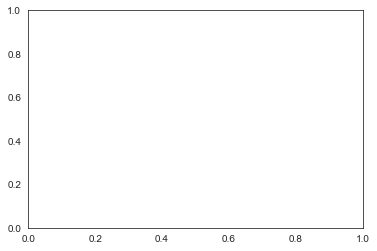

In [40]:
#Bronze Bar Chart - only one that wont work???
role = bronze_combined_df['Primary Role']
wins = bronze_combined_df['wins']

plt.bar(role,wins, align = "center", color= 'xkcd:tangerine')
plt.xlabel("Primary Role")
plt.ylabel("Wins")
plt.title('Wins per Primary Role in Bronze Tier')
plt.show()

- Bronze PieChart

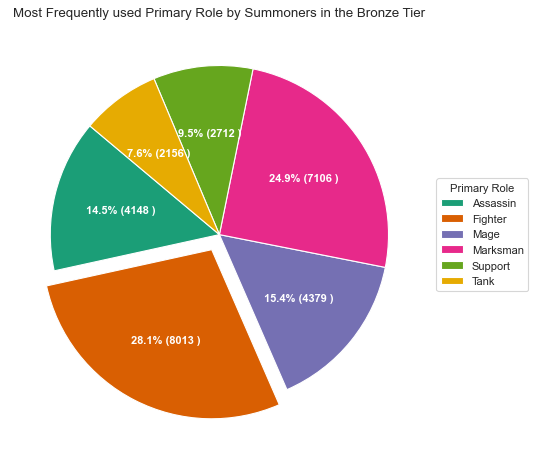

In [41]:
# Prepare Data
pie = bronze_combined_df.groupby('Primary Role').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = pie['counts']
categories = pie['Primary Role']
explode = [0,0.1,0,0,0,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Primary Role", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Most Frequently used Primary Role by Summoners in the Bronze Tier")

plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Bronze_PieChart.png")

plt.show()

- Bronze Scatter Plot

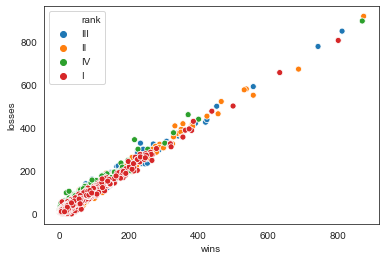

In [42]:
#wins vs losses from Bronze subset
rank = bronze_combined_df['rank']
sns.scatterplot(x=bronze_combined_df.wins, y=bronze_combined_df.losses, hue = rank)

- Averages

In [62]:
#Average amount of wins for summoner in Top 4 Tiers
bronze_wins_avg = round(bronze_combined_df['wins'].mean())
#Average amount of losses for summoner in Top 4 Tiers
bronze_loss_avg = round(bronze_combined_df['losses'].mean())

print("The Average Amount of wins for summoner in Bronze Tier :" , bronze_wins_avg)
print("The Average Amount of losses for summoner in Bronze Tier :" , bronze_loss_avg)

The Average Amount of wins for summoner in Bronze Tier : 30
The Average Amount of losses for summoner in Bronze Tier : 36


### Silver Tier Analysis

- Silver TreeMap

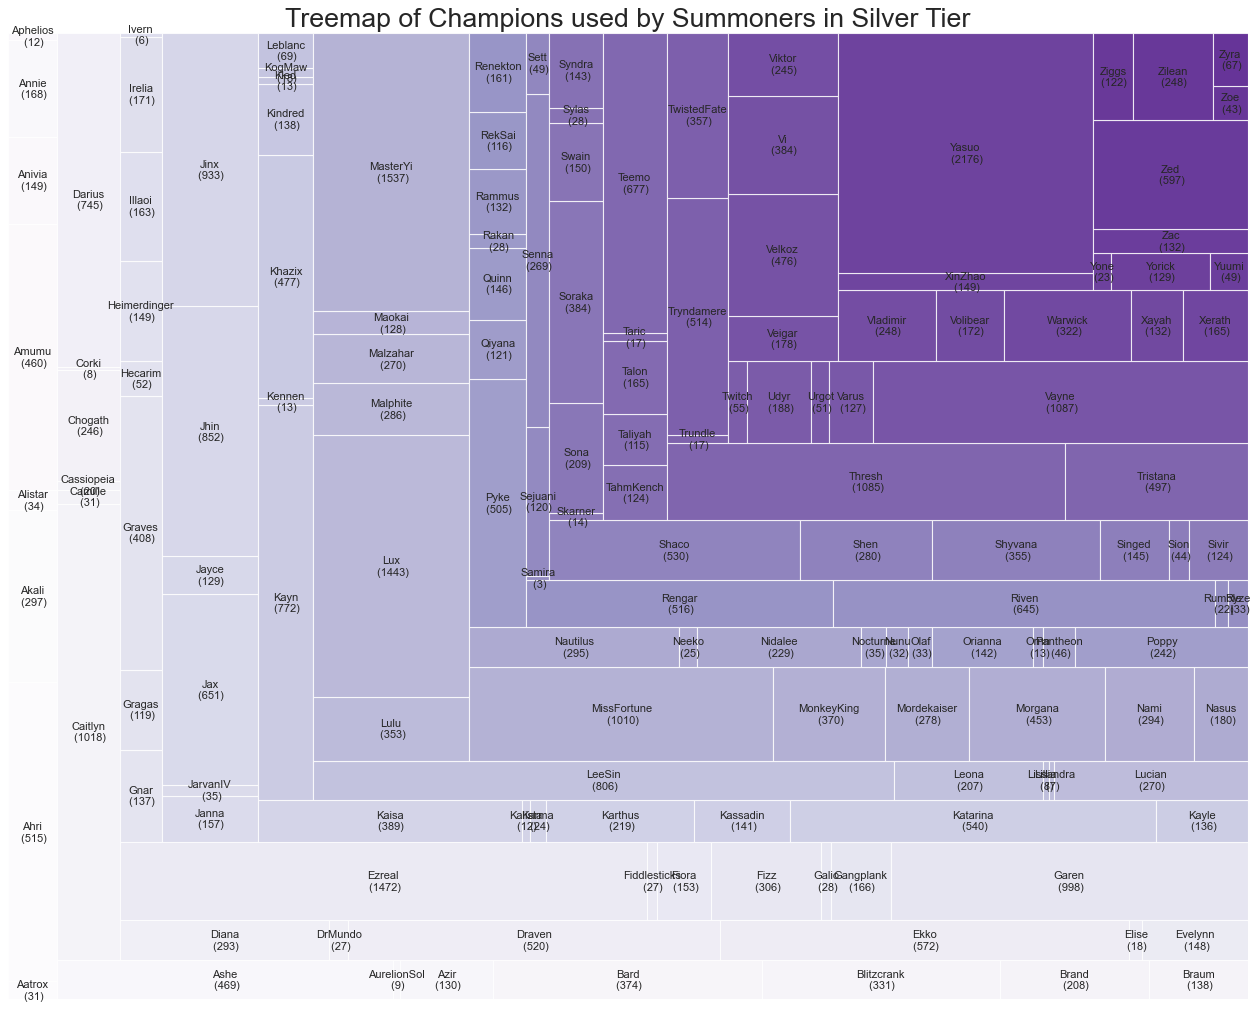

In [43]:
#Silver TreeMap
treemap_1 = silver_combined_df.groupby('Champion Name').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('Purples')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Silver Tier', fontsize=24)
plt.axis('off')

plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Silver_Treemap.png")

- Silver BarChart

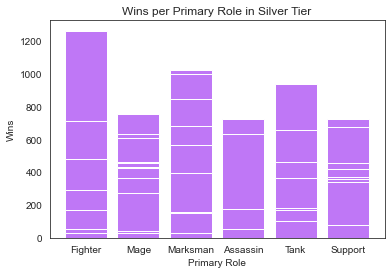

In [44]:
role = silver_combined_df['Primary Role']
wins = silver_combined_df['wins']

plt.bar(role,wins, align = "center", color= 'xkcd:light purple')
plt.xlabel("Primary Role")
plt.ylabel("Wins")
plt.title('Wins per Primary Role in Silver Tier')
plt.show()

- Silver PieChart

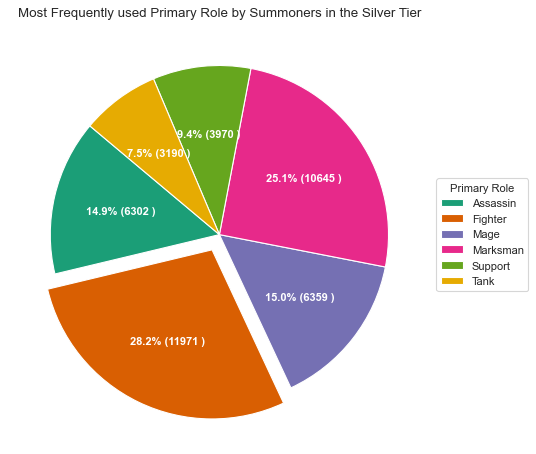

In [45]:
# Prepare Data
pie = silver_combined_df.groupby('Primary Role').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = pie['counts']
categories = pie['Primary Role']
explode = [0,0.1,0,0,0,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Primary Role", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Most Frequently used Primary Role by Summoners in the Silver Tier")

plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Silver_PieChart.png")

plt.show()

- Silver ScatterPlot

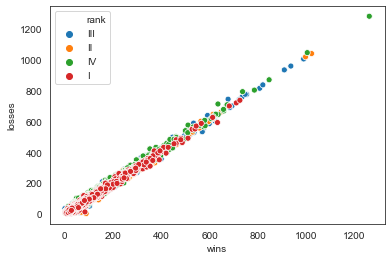

In [46]:
#wins vs losses from Iron subset
rank = silver_combined_df['rank']
sns.scatterplot(x=silver_combined_df.wins, y=silver_combined_df.losses, hue = rank)

- Averages

In [63]:
#Average amount of wins for summoner in Top 4 Tiers
silver_wins_avg = round(silver_combined_df['wins'].mean())
#Average amount of losses for summoner in Top 4 Tiers
silver_loss_avg = round(silver_combined_df['losses'].mean())

print("The Average Amount of wins for summoner in Silver Tier :" , silver_wins_avg)
print("The Average Amount of losses for summoner in Silver Tier :" , silver_loss_avg)

The Average Amount of wins for summoner in Silver Tier : 75
The Average Amount of losses for summoner in Silver Tier : 79


### Gold Tier Analysis

- Gold TreeMap

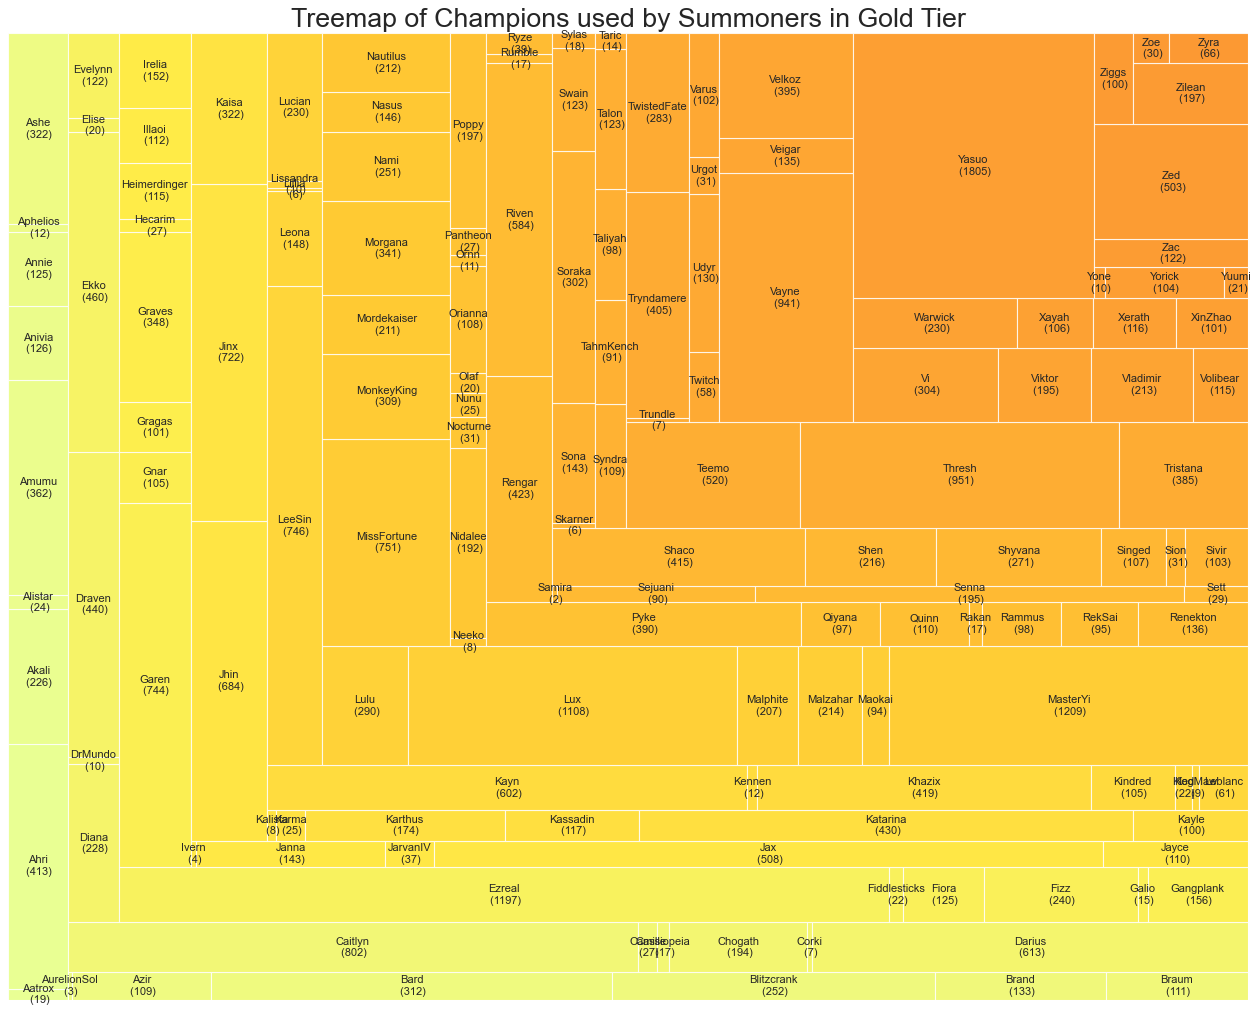

In [47]:
#TreeMap of Summoners in Gold Tier
treemap_1 = gold_combined_df.groupby('Champion Name').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('Wistia')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Gold Tier', fontsize=24)
plt.axis('off')


plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Gold_Treemap.png")

- Gold PieChart

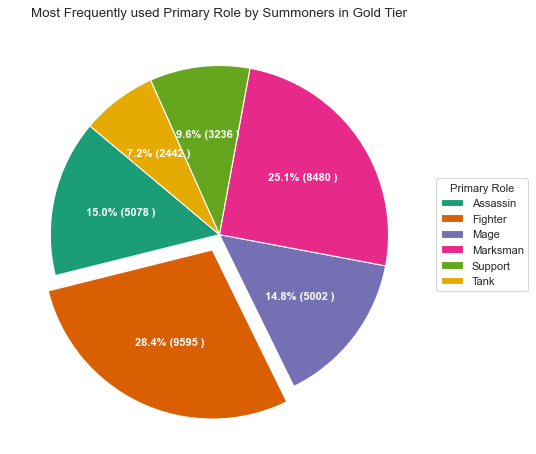

In [48]:
# Prepare Data
pie = gold_combined_df.groupby('Primary Role').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = pie['counts']
categories = pie['Primary Role']
explode = [0,0.1,0,0,0,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Primary Role", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Most Frequently used Primary Role by Summoners in Gold Tier")

plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Gold_PieChart.png")

plt.show()

- Gold Bar Chart

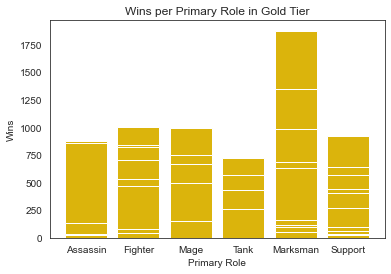

In [49]:
role = gold_combined_df['Primary Role']
wins = gold_combined_df['wins']

#order = ['Assassin', 'Fighter', 'Mage', 'Tank', 'Marksman', 'Support']

plt.bar(role,wins, align = "center", color= 'xkcd:gold')
plt.xlabel("Primary Role")
plt.ylabel("Wins")
plt.title('Wins per Primary Role in Gold Tier')
plt.show()

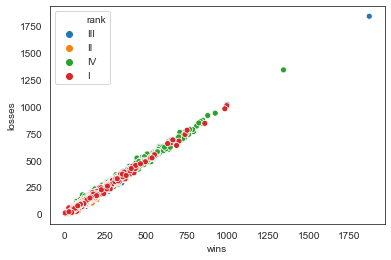

In [51]:
#wins vs losses from Iron subset
rank = gold_combined_df['rank']
sns.scatterplot(x= gold_combined_df.wins, y= gold_combined_df.losses, hue = rank)

In [52]:
#Average amount of wins for summoner in Gold Tier
gold_wins_avg = round(gold_combined_df['wins'].mean())
#Average amount of losses for summoner in Gold Tier
gold_loss_avg = round(gold_combined_df['losses'].mean())

print("The Average Amount of wins for summoner in Gold Tier :" , gold_wins_avg)
print("The Average Amount of losses for summoner in Gold Tier :" , gold_loss_avg)

The Average Amount of wins for summoner in Gold Tier : 124
The Average Amount of losses for summoner in Gold Tier : 122


### Platinum tier analysis

- Platinum TreeMap

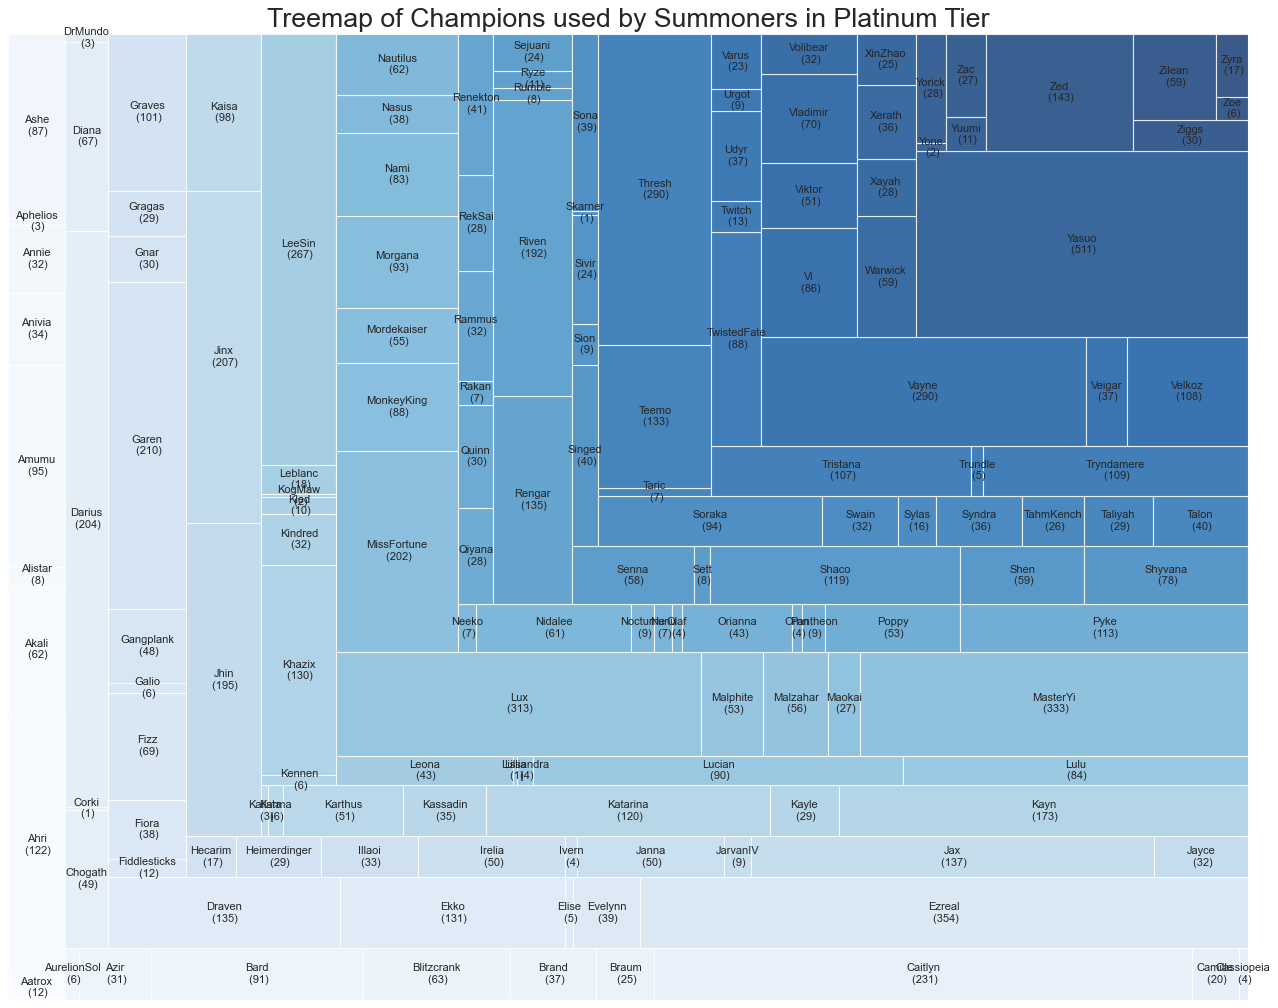

In [53]:
#Make Treemap of Champions used by summoners in Platinum Tier
treemap_1 = platinum_combined_df.groupby('Champion Name').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('Blues')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Platinum Tier', fontsize=24)
plt.axis('off')

plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Platinum_Treemap.png")

- Platinum BarChart

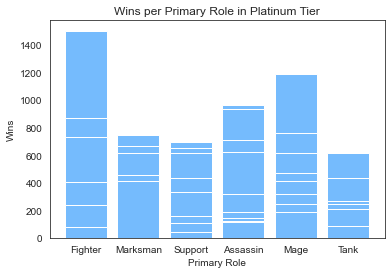

In [54]:
role = platinum_combined_df['Primary Role']
wins = platinum_combined_df['wins']

plt.bar(role,wins, align = "center", color= 'xkcd:sky blue')
plt.xlabel("Primary Role")
plt.ylabel("Wins")
plt.title('Wins per Primary Role in Platinum Tier')
plt.show()

- Platinum PieChart

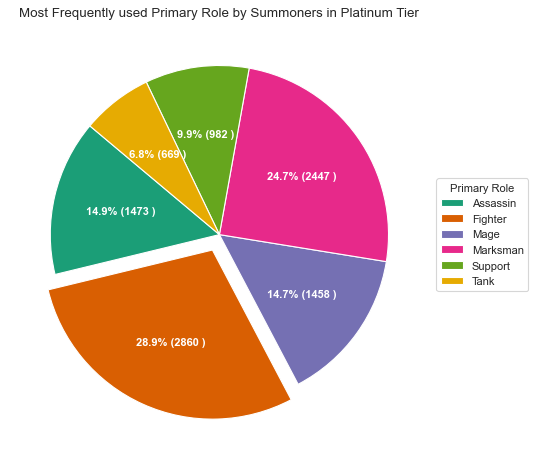

In [55]:
# Prepare Data
pie = platinum_combined_df.groupby('Primary Role').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = pie['counts']
categories = pie['Primary Role']
explode = [0,0.1,0,0,0,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Primary Role", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Most Frequently used Primary Role by Summoners in Platinum Tier")

plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Platinum_PieChart.png")

plt.show()

- Platinum ScatterPlot

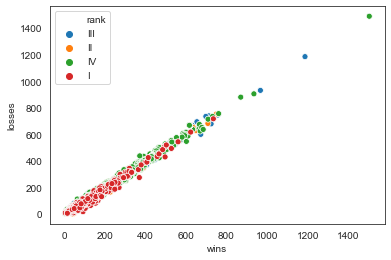

In [85]:
#wins vs losses from Platinum subset
rank = platinum_combined_df['rank']
sns.scatterplot(x = platinum_combined_df.wins, y=platinum_combined_df.losses, hue = rank)


In [64]:
#Average amount of wins for summoner in Platinum Tier
plat_wins_avg = round(platinum_combined_df['wins'].mean())
#Average amount of losses for summoner in Platinum Tier
plat_loss_avg = round(platinum_combined_df['losses'].mean())

print("The Average Amount of wins for summoner in Platinum Tier :" , plat_wins_avg)
print("The Average Amount of losses for summoner in PLatinum Tier :" , plat_loss_avg)

The Average Amount of wins for summoner in Platinum Tier : 183
The Average Amount of losses for summoner in PLatinum Tier : 177


### Top 4 Tiers Analysis (Diamond, Master, GrandMaster and Challenger) 

- Elite Tier TreeMap

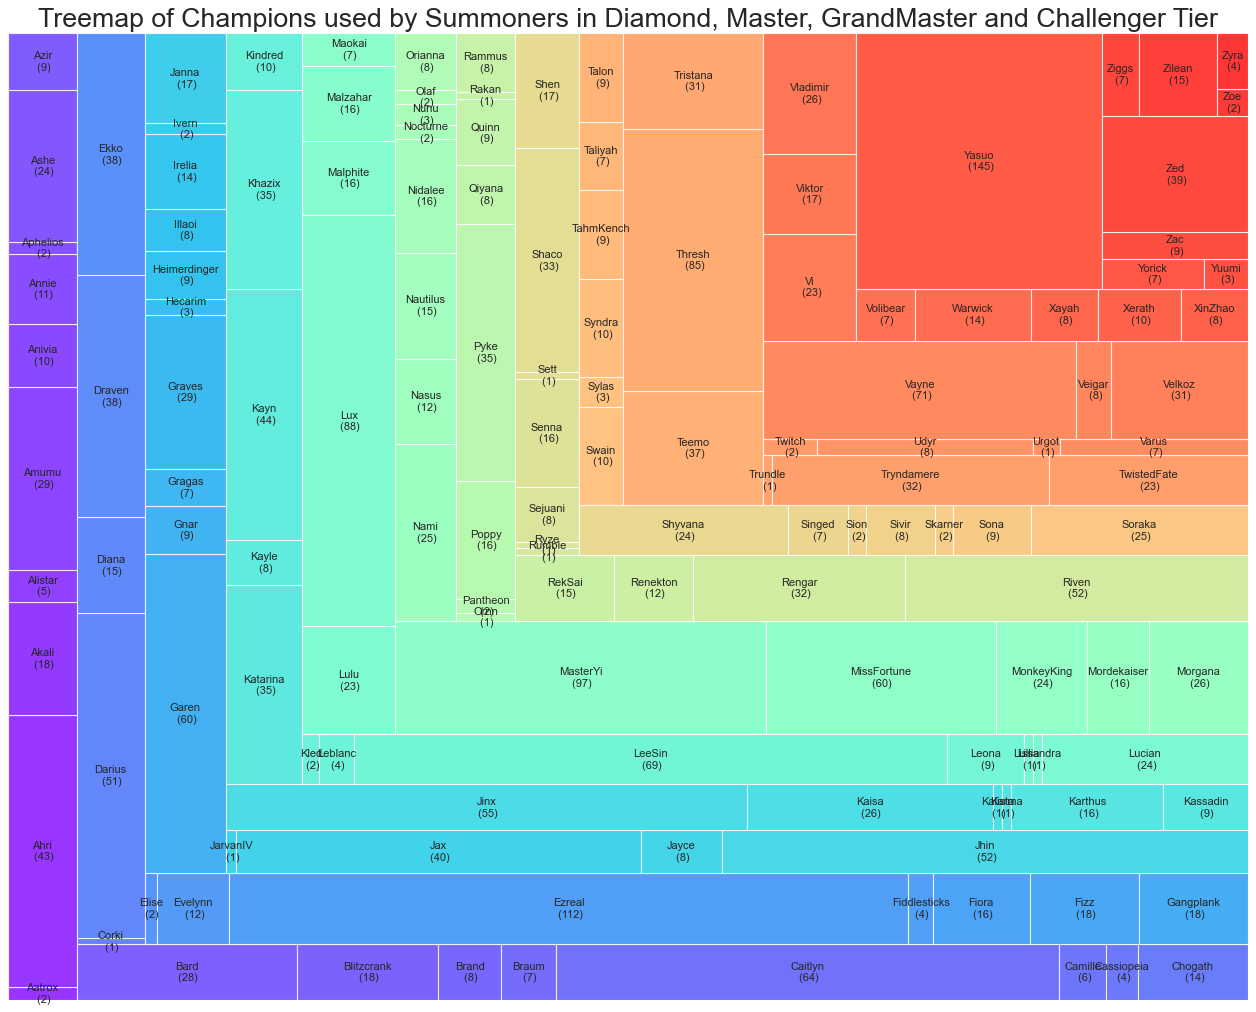

In [65]:
#TreeMap for Diamond, Master, GrandMaster and Challenger Tier
treemap_1 = DMGC_combined_df.groupby('Champion Name').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('rainbow')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Diamond, Master, GrandMaster and Challenger Tier', fontsize=24)
plt.axis('off')

plt.savefig("/Users/jw/Desktop/Group-3-Project/images/DMGC_Treemap.png")

- Elite Tier BarChart

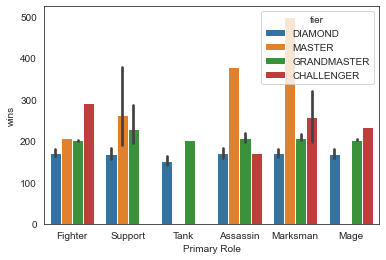

In [66]:
sns.barplot(y = 'wins', x = 'Primary Role', hue = 'tier', data=DMGC_combined_df)

- Eliter Tier PieChart

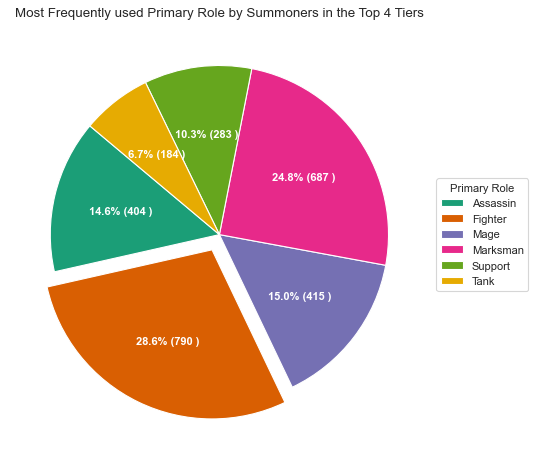

In [67]:
# Prepare Data
pie = DMGC_combined_df.groupby('Primary Role').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = pie['counts']
categories = pie['Primary Role']
explode = [0,0.1,0,0,0,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Primary Role", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Most Frequently used Primary Role by Summoners in the Top 4 Tiers")

plt.savefig("/Users/jw/Desktop/Group-3-Project/images/DMGC_PieChart.png")

plt.show()

- Elite Tier ScatterPlot

The r-squared is: 0.9810195745919014


Text(800, 200, 'y = 1.01x + -15.0')

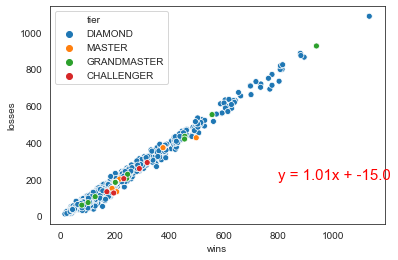

In [93]:
import scipy.stats as st
tier = DMGC_combined_df['tier']


sns.scatterplot(x=DMGC_combined_df.wins, y=DMGC_combined_df.losses, hue = tier)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(DMGC_combined_df.wins,DMGC_combined_df.losses)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")

regress_values = DMGC_combined_df.wins * slope + intercept
plt.annotate(line_eq,(800,200),fontsize=15,color="red")

- Averages

In [69]:
#Average amount of wins for summoner in Top 4 Tiers
DMGC_wins_avg = round(DMGC_combined_df['wins'].mean())
#Average amount of losses for summoner in Top 4 Tiers
DMGC_loss_avg = round(DMGC_combined_df['losses'].mean())

print("The Average Amount of wins for summoner in the Top 4 Tiers :" , DMGC_wins_avg)
print("The Average Amount of losses for summoner in the Top 4 Tier :" , DMGC_loss_avg)

The Average Amount of wins for summoner in the Top 4 Tiers : 174
The Average Amount of losses for summoner in the Top 4 Tier : 161


### Additional Analysis

- TreeMap of Primary Role used by summoners in all Tiers

(0.0, 100.0, 0.0, 100.0)

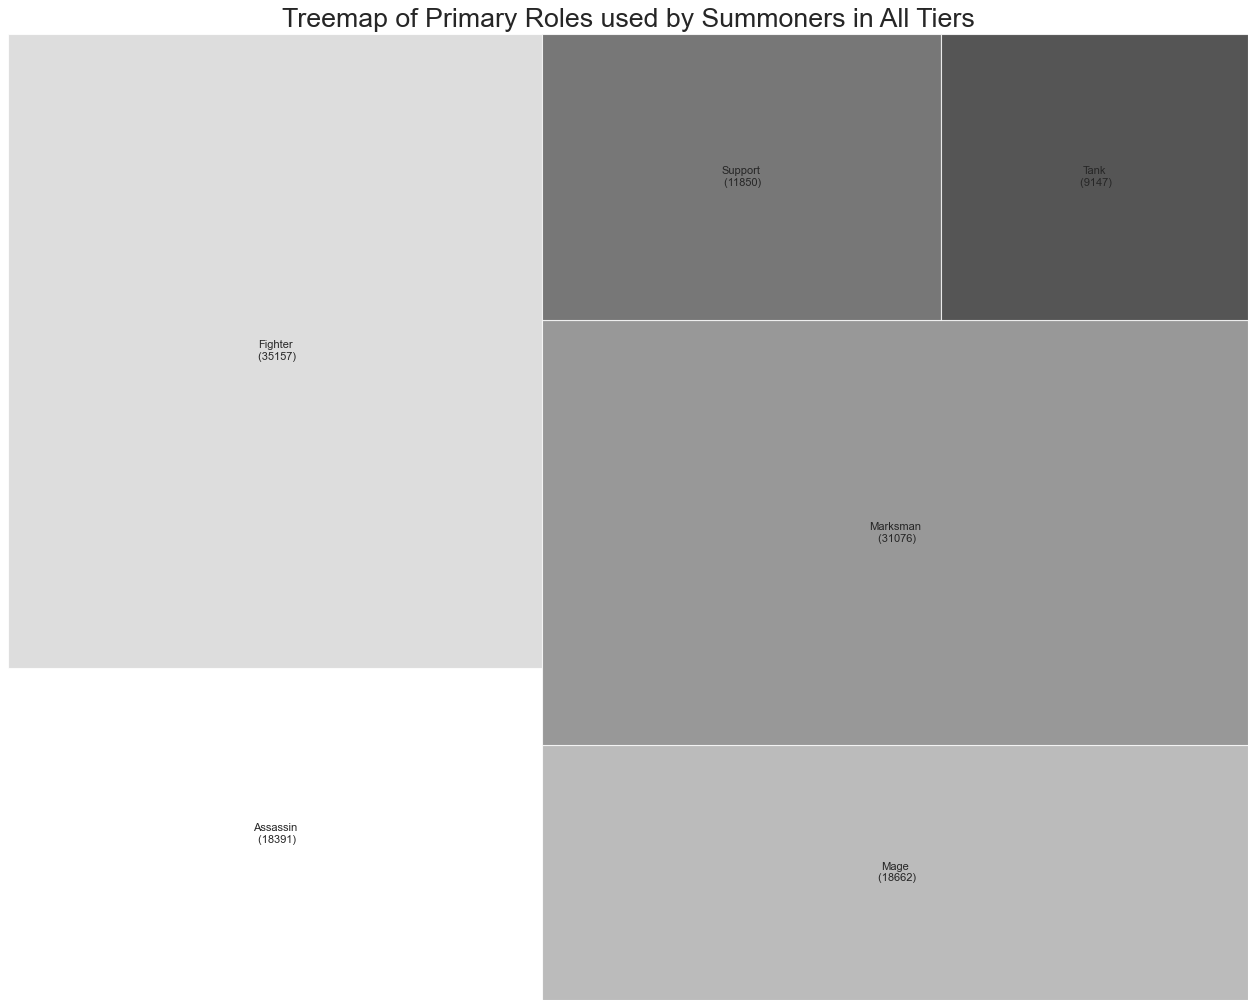

In [73]:
#TreeMap showing Primary Role used by summoners in ALL Tiers
treemap_1 = combined_mastery.groupby('Primary Role').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('binary')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Primary Roles used by Summoners in All Tiers', fontsize=24)
plt.axis('off')

- Demographic Information across all Tiers - BarChart

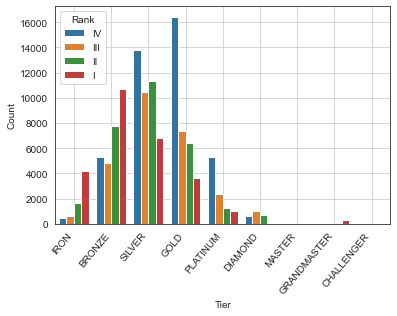

In [95]:
# Demographic distribution among tiers.
summoner_champion_df = pd.read_csv("summoner_champion.csv")

tier_demographic = summoner_champion_df.groupby(["tier", "rank"])["leagueId"].count()
tier = ["IRON", "BRONZE", "SILVER", "GOLD", "PLATINUM", "DIAMOND","MASTER","GRANDMASTER","CHALLENGER"]
tier_demographic = tier_demographic.reindex(tier, level=0)
tier_demographic = tier_demographic.sort_index(level=[0,1], ascending=[1,0])
tier_demographic = tier_demographic.reset_index()
tier_demographic.columns = ["Tier", "Rank", "Count"]
sns.barplot(x="Tier", y="Count", hue="Rank", data=tier_demographic)
plt.xticks(rotation=50, ha='right')
plt.grid()

- Wins v Loss comparison among all Tiers

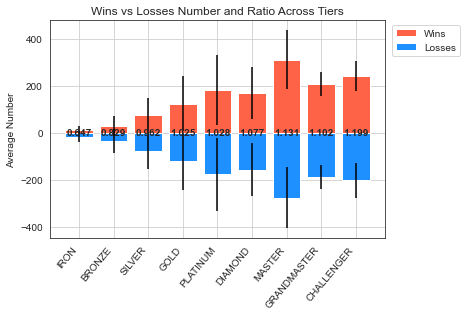

In [96]:
rank_win = summoner_champion_df.groupby('tier')["wins"].mean().astype(int).reset_index()
rank_loss = summoner_champion_df.groupby('tier')["losses"].mean().astype(int).reset_index()
win_loss = rank_win.merge(rank_loss, on="tier", how="left")
win_loss = win_loss.set_index('tier')
tier = ["IRON", "BRONZE", "SILVER", "GOLD", "PLATINUM", "DIAMOND","MASTER","GRANDMASTER","CHALLENGER"]
win_loss = win_loss.reindex(tier)
win_loss = win_loss.reset_index()
win_loss.columns = ["Tier", "Wins", "Losses"]
win_loss["Losses"] = [-x for x in win_loss["Losses"]]

win_std = summoner_champion_df.groupby('tier')["wins"].std()
win_std = win_std.reindex(tier).tolist()
loss_std = summoner_champion_df.groupby('tier')["losses"].std()
loss_std = loss_std.reindex(tier).tolist()

labels = win_loss["Tier"]
wins = win_loss["Wins"]
losses = win_loss["Losses"]

fig, ax = plt.subplots()

ax.bar(labels, wins, width=0.8, yerr = win_std, label='Wins', color='tomato')
ax.bar(labels, losses, width=0.8, yerr = loss_std, bottom=0,label='Losses', color='dodgerblue')

ax.set_ylabel('Average Number')
ax.set_title('Wins vs Losses Number and Ratio Across Tiers')
ax.legend(bbox_to_anchor=(1.24,1))
plt.xticks(rotation=50, ha='right')

rects=ax.patches
labels = (wins/abs(losses)).round(3).tolist()

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text((rect.get_x() + rect.get_width()/2), 0, label, ha='center', va='center',fontweight='semibold')

plt.grid()
plt.show()